<a href="https://colab.research.google.com/github/doeungim/ADP_DE2/blob/main/6.%20%EC%B0%A8%EC%9B%90%EC%B6%95%EC%86%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주성분 분석 (Principal Component Analysis, PCA)

## 1. 기본 원리 설명
주성분 분석(PCA)은 데이터의 차원을 축소하면서도 데이터의 분산(정보)을 최대한 보존하는 기법입니다.
- 데이터의 상관관계를 분석하여 새로운 축(주성분)을 생성합니다.
- 생성된 주성분은 데이터의 분산을 최대화하는 방향으로 정렬됩니다. 분산이 큰 방향에서부터 순서대로 축을 다시 잡는 방법으로, 변수 간 종속성이 클수록 더 소수의 주성분으로 데이터를 표현
- 첫 번째 주성분은 가장 큰 분산을 설명하며, 두 번째 주성분은 첫 번째와 직교(orthogonal)하면서 다음으로 큰 분산을 설명합니다.
- 정규 분포를 따르는 조건을 가정 (왜곡된 분포는 적절치 않기 때문에 표준화 작업 같은 변수 변환이 필요)
- 두 축을 설명하기 어렵고, 선형 변환의 한계로 데이터의 비선형 구조를 반영하기 어렵다.

---

## 2. 언제 사용할 수 있는지
PCA는 다음과 같은 경우에 사용할 수 있습니다:
- **차원 축소**: 고차원 데이터를 저차원으로 축소하여 시각화 및 계산 효율성 향상.
- **노이즈 제거**: 데이터의 주요 패턴을 강조하고 잡음을 줄임.
- **특징 선택**: 데이터의 가장 중요한 정보를 가진 축을 선택하여 분석.

---

## 3. K-means 할 때 왜 PCA를 사용하는지
### 이유
1. **고차원 문제 해결**: K-means는 고차원 데이터에서 효율이 떨어질 수 있습니다. PCA를 통해 차원을 축소하여 계산을 간소화합니다.
2. **특징 선택**: PCA로 주요 특징만 유지하면 K-means의 성능을 향상시킬 수 있습니다.
3. **노이즈 제거**: PCA를 통해 노이즈를 제거하면 클러스터링이 더 정확해질 수 있습니다.

### 주성분 분석을 해야 하는지 결정하는 방법
- **데이터 차원 수**: 차원이 너무 높으면 PCA가 유용합니다.
- **상관관계**: 피처 간 상관관계가 높을 경우 PCA로 정보를 압축할 수 있습니다.
- **성능 비교**: PCA 적용 전후 K-means의 결과를 비교하여 유효성을 평가합니다.

---

## 4. Scree Plot 해석 방법
Scree Plot은 각 주성분의 고유값을 순서대로 나타낸 그래프입니다.
- **고유값**: 각 주성분이 설명하는 데이터의 분산.
- **Elbow Point**: 그래프에서 설명력이 급격히 감소하는 지점을 찾습니다. 이 지점까지의 주성분을 선택하는 것이 일반적입니다.
- 예: 고유값이 1 이상이거나 설명된 분산 비율의 합이 70~90%인 경우.

---

## 5. 차원 축소의 그 외 종류
1. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**:
   - 비선형 차원 축소 기법으로 고차원 데이터를 저차원으로 임베딩.
   - 데이터 군집화에 자주 사용.
2. **UMAP (Uniform Manifold Approximation and Projection)**:
   - t-SNE보다 더 빠르고 구조적 관계를 잘 유지.
3. **LDA (Linear Discriminant Analysis)**:
   - 지도 학습 기반으로 클래스 간 분산을 최대화하여 차원 축소.
4. **Autoencoder**:
   - 신경망을 활용한 비선형 차원 축소 기법.
5. **Feature Selection**:
   - 데이터의 특정 변수만 선택하여 차원 축소.

---

## 6. 위 내용의 Python 코드

```python
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 데이터 준비
data = {
    'Feature1': [2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2.0, 1.0, 1.5, 1.1],
    'Feature2': [2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9]
}
df = pd.DataFrame(data)

# 데이터 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# PCA 수행
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Scree Plot
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

# K-means 클러스터링
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pca_data)

# PCA 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, cmap='viridis', edgecolor='k')
plt.title('PCA with K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

# 출력: 설명된 분산 비율
print(f"Explained Variance Ratio: {explained_variance}")


### VIF와 PCA의 관계

### 1. Variance Inflation Factor (VIF)
- **목적**: 다중공선성 진단.
- **기준**: \( VIF > 5 \) 또는 \( VIF > 10 \) → 다중공선성 문제 존재.
- **결과**: 다중공선성이 높은 변수를 식별.

### 2. Principal Component Analysis (PCA)
- **목적**: 고차원 데이터를 저차원으로 축소하며 공선성 제거.
- **작동 방식**: 데이터의 분산을 최대화하는 주성분(비상관 변수) 생성.
- **결과**: 공선성이 제거된 새로운 변수(주성분) 생성.

### 3. VIF와 PCA의 관계
1. **다중공선성 해결**:
   - VIF는 공선성 **진단**, PCA는 공선성 **해결**.
2. **PCA 적용 후 VIF**:
   - PCA로 생성된 변수는 상관성이 없어 VIF = 1에 가까움.
3. **활용**:
   - VIF로 공선성 문제를 확인 → PCA로 해결 가능.

### 요약
- **VIF**: 다중공선성을 진단.
- **PCA**: 다중공선성을 해결.
- **조합 사용**: VIF로 문제를 파악하고, 필요 시 PCA를 적용.



In [1]:
### 1) 데싸라면 예제_1


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://raw.githubusercontent.com/snkn1959/data_source/main/customer_pca.csv'
customer = pd.read_csv(file_url)
df = customer.copy()
df.head()


# Label 과 Label이 없는 내용 분리
X = df.drop(columns = ['label'])
y = df['label']

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11
ratio,0.678877,0.134967,0.079103,0.044032,0.029978,0.014528,0.006611,0.004667,0.003329,0.002720,0.001189,6.129277e-31
cumsum,0.678877,0.813844,0.892947,0.936979,0.966957,0.981485,0.988096,0.992763,0.996091,0.998811,1.000000,1.000000e+00


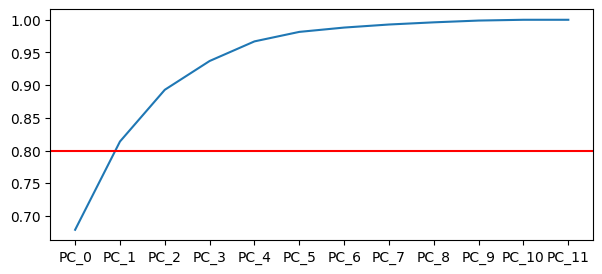

In [2]:
# PCA
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

pca_df = pd.DataFrame(
    {'ratio' : pca.explained_variance_ratio_,
     'cumsum' : pca.explained_variance_ratio_.cumsum()
    } )
pca_df.index = ['PC_' + str(x) for x in pca_df.index ]
display(pca_df.T)

plt.figure(figsize = (7, 3))
plt.plot(pca_df['cumsum'])
plt.axhline(0.8, color = 'r')

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,0.348468,0.324472,0.303037,0.141869,0.306183,0.312973,0.297189,0.304582,0.293413,0.302877,0.320534,0.089275
1,0.058276,0.060343,0.152647,-0.544356,0.031095,0.037906,0.238096,-0.231528,-0.247193,-0.208983,0.144790,0.659468


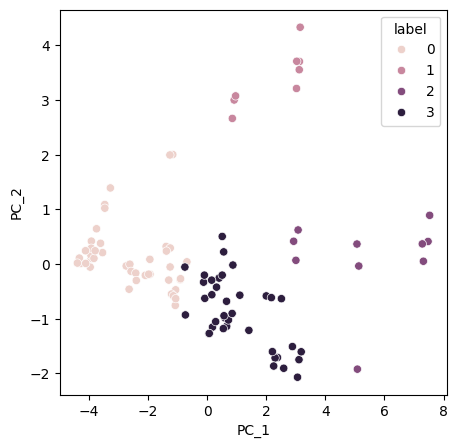

In [3]:
pca_2 = PCA(n_components=2)
pca_2.fit(X)
pca_X = pca_2.fit_transform(X)

pca2_df =pd.DataFrame(pca_X, columns = ['PC_1','PC_2'])

pca_final_df = pd.concat([pca2_df, y], axis = 1)

plt.figure(figsize = (5,5))
sns.scatterplot(x = 'PC_1', y = 'PC_2', hue = 'label', data = pca_final_df)

# 각 주성분과 기존 변수와의 상관관계 ; components_
df_comp = pd.DataFrame(pca_2.components_ , columns = X.columns)
display(df_comp)

# 해석하기
# PC1과 amt의 상관관계는 0.35임으로, PC1이 높다 = 그만큼의 크기만큼 amt 가 높다.
# PC2와 category_gas_transport 의 상관관계는 -0.54, PC2가 높을 수록 category_gas_transport의 값은 낮다.

In [4]:
### 1) 데싸라면 예제_2 - PCA에 따른 모델 성능/결과 비교

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/anonymous.csv'
anonymous = pd.read_csv(file_url)

df = anonymous.copy()

X = df.drop(columns = 'class' , axis = 1)
y = df['class']

In [5]:
## PCA에서도 변수간의 Scale 조정이 필요
from sklearn.preprocessing import StandardScaler
scaled_x = StandardScaler().fit_transform(X)

In [6]:
# 세트 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.2, random_state=100)

In [7]:
# 모델 설정 - Before PCA

# 1. roc_auc_score - 모델의 분류 성능을 예측 확률 기반으로 평가 / 불균형 데이터서 주로 사용 :predict_proba() 사용 필수
# 2. accuracy_score - 정확도를 평가
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

rf = RandomForestClassifier(random_state=100)
rf.fit(X_train , y_train)

pred_before_pca = rf.predict(X_test)
accuracy_score(y_test , pred_before_pca)

0.958

In [9]:
# 모델 설정 - After PCA
# 40개의 컬럼을 차원을 축소 하게 되면, "데이터 손실" 발생 - 주성분 2개로 차원을 축소 후, 데이터 손실 확인하기
import time

pca = PCA(n_components=400, random_state = 100)
pca_400_train = pca.fit_transform(X_train)
pca_400_test = pca.fit_transform(X_test)

rf_after_pca = RandomForestClassifier(random_state=100)
start_time = time.time()
rf_after_pca.fit(pca_400_train, y_train)


# Accuracy_score
pred_2 = rf_after_pca.predict(pca_400_test)
accu = accuracy_score(y_test, pred_2)
print(accu)


proba_2 = rf_after_pca.predict_proba(pca_400_test)
roc_2 = roc_auc_score(y_test, proba_2[:,1])
print(roc_2)

0.73875
0.6540710336061658


In [22]:
## 완벽 머신러닝

df = pd.read_csv('https://raw.githubusercontent.com/MatteoM95/Default-of-Credit-Card-Clients-Dataset-Analisys/refs/heads/main/dataset/default_of_credit_card_clients.csv', index_col = 'ID')

# Rename columns
df.rename(columns = {'default payment next month' : 'default', 'PAY_0' : 'PAY_1'}, inplace = True)
y = df['default']
X = df.drop(columns = ['default'], axis = 1)

- BILL_AMT1~6까지의 속성끼리 상관도가 높음
- PAY_1 ~ 6
- PAY_AMT 1 ~ 6
- 상관도가 높은 속성들은 PCA로 속성의 변동성을 수용 가능

In [44]:
bill_cols = ['BILL_AMT' + str(i) for i in range (1,7)]
pay_cols = ['PAY_' + str(i) for i in range(1,7)]
amt_cols = ['PAY_AMT' + str(i) for i in range(1,7)]

# extend 함수 : 이어 붙이기
bill_cols.extend(pay_cols)
bill_cols.extend(amt_cols)

ss = StandardScaler()
df_col_scaled = ss.fit_transform(X[bill_cols])

# X 에서 정규화된 컬럼을 넣기
X.loc[:, bill_cols] = df_col_scaled


pca = PCA()
pca.fit(df_col_scaled)

# plot, 표로 변동성 확인

pca_df = pd.DataFrame({'ratio' : pca.explained_variance_ratio_ ,
              'cumsum': pca.explained_variance_ratio_.cumsum()})
pca_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
ratio,0.361802,0.206185,0.083624,0.050853,0.049338,0.048455,0.043494,0.040705,0.038007,0.022466,0.014476,0.013916,0.010486,0.007324,0.003901,0.002273,0.001405,0.001291
cumsum,0.361802,0.567987,0.651610,0.702463,0.751801,0.800256,0.843750,0.884456,0.922463,0.944929,0.959404,0.973320,0.983806,0.991130,0.995031,0.997304,0.998709,1.000000


In [46]:
## 원본과 PCA 적용의 차이를 3개의 교차 검증 세트로 분류
from sklearn.model_selection import cross_val_score
# 1) 원본
rf = RandomForestClassifier(n_estimators= 300, random_state = 156)
scores = cross_val_score(rf, X, y, scoring = 'accuracy', cv = 3)
print(scores)
print(np.mean(scores))

[0.8081 0.8197 0.8232]
0.8170000000000001


In [47]:
# 2) PCA 적용
ss = StandardScaler()
scaled_X = ss.fit_transform(X)

# PCA
pca = PCA(n_components=6)
df_pca = pca.fit_transform(scaled_X)

# rf - cross_val_score (교차검증)
score_pca = cross_val_score(rf, df_pca, y, scoring = 'accuracy', cv = 3)
print(score_pca)
print(np.mean(score_pca))

[0.7912 0.7974 0.802 ]
0.7968666666666667


PCA로 6개의 컴포넌트로만 예측한 결과의 차이가 전체 원본 데이터의 차이와 크지 않아, 전체 속성의 1/4인 6개의 변수로도 성능을 유지 할 수 있는 것이 PCA의 특징

## LDA (Linear Discriminant Analysis)

### 1. LDA의 원리 및 특징
- **LDA (Linear Discriminant Analysis)**는 데이터의 클래스(범주)를 구분하는 데 초점을 맞춘 차원 축소 기법입니다.
- 데이터의 분류(Classification)를 위해 **클래스 간 분산(Between-Class Variance)**을 최대화하고, **클래스 내 분산(Within-Class Variance)**을 최소화하는 투영 축을 찾는 것이 목표입니다.
- 데이터가 특정 클래스에 속할 확률을 기반으로 **결정 경계(Decision Boundary)**를 형성하여 분류를 수행합니다.

1. **클래스 내 평균 계산**:
   - 각 클래스의 중심(평균 벡터)을 계산합니다.
2. **분산/공분산 행렬 계산**:
   - 클래스 내 분산(Within-Class Scatter Matrix)과 클래스 간 분산(Between-Class Scatter Matrix)을 계산합니다.
3. **투영 축 찾기**:
   - `SW⁻¹ * SB`(클래스 내 분산 행렬의 역행렬과 클래스 간 분산 행렬의 곱)의 고유값과 고유벡터를 계산합니다.
   - 가장 큰 고유값에 해당하는 고유벡터가 데이터의 최적 투영 방향을 나타냅니다.
4. **데이터 투영**:
   - 데이터를 최적 투영 축으로 변환하여 차원을 축소합니다.

### 특징
- 데이터의 클래스 분리를 극대화하기 위해 설계되었습니다.
- 지도 학습(Supervised Learning) 기법으로, 클래스 레이블 정보가 필요합니다.
- 차원을 줄이면서도 데이터의 분류 정보를 최대한 보존하려고 합니다.
- 차원 축소뿐만 아니라 분류 알고리즘으로도 활용됩니다.

---

## 2. PCA와 LDA의 차이
| **특징**           | **PCA (Principal Component Analysis)**                                           | **LDA (Linear Discriminant Analysis)**                                |
|--------------------|------------------------------------------------------------------------------|---------------------------------------------------------------------|
| **목적**           | 데이터의 분산(Variance)을 최대화하는 축을 찾음                                      | 클래스 간 분리를 최대화하고 클래스 내 분산을 최소화하는 축을 찾음                        |
| **알고리즘 유형**   | 비지도 학습 (Unsupervised Learning)                                             | 지도 학습 (Supervised Learning)                                      |
| **입력 데이터**    | 클래스 레이블 정보 필요 없음                                                     | 클래스 레이블 정보 필요                                              |
| **기준**           | 데이터의 전체 분산을 기준으로 주요 축을 찾음                                       | 클래스 간 분산(Between-Class)과 클래스 내 분산(Within-Class)을 기준으로 축을 찾음 |
| **결과물**         | 최대 분산을 설명하는 주성분 (Principal Components) 축으로 데이터 투영                 | 데이터 클래스 간의 분리를 극대화하는 축으로 데이터 투영                                |
| **적용 범위**     

```python
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# 데이터 로드 및 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# LDA 적용
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# KNN 분류기 학습
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_lda, y_train)

# 예측 및 정확도 평가
y_pred = knn.predict(X_test_lda)
accuracy = accuracy_score(y_test, y_pred)
print(f"LDA + KNN Accuracy: {accuracy:.2f}")

# 결과 시각화
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap='viridis', edgecolor='k')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA on Iris Dataset')
plt.colorbar(label='Class')
plt.show()
```
